<a href="https://colab.research.google.com/github/mugalan/lessons/blob/main/mechanics/answers-to-selected-assignments/Examples_of_Describing_Motion_in_Moving_Frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examples of Description of Motion in Moving Frames

* This solution was worked out by Chathuska Chamith (chathushkachamith11@gmail.com)


In [2]:
import math as m
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go

from sympy import symbols
from sympy import *

from sympy.physics.mechanics import dynamicsymbols

# 
from sympy.physics.vector import init_vprinting
init_vprinting(pretty_print=True)

In [3]:
class mugas_dynamic_systems_simulation_functions:
  
  def __init__(self): 
    self=[];

  def simulateDySystem(self, dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig] 

  def Q3simu(X_0, Parem, dT, tsampl):
    X_n = X_0
    X_n = np.array(X_n)
    X_n = np.t
    #for i in range(tsampl):


  def animate_particle_motion(self, XX, axisRange, figTitle):
    xx=[jj[0] for jj in XX]
    yy=[jj[1] for jj in XX]
    zz=[jj[2] for jj in XX]

    fig = go.Figure(
        data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                        mode="markers",
                        marker=dict(color="red", size=10)),
              go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                        mode="lines",
                        line=dict(color="blue", width=2))],
        layout=go.Layout(
            scene = dict(
                        xaxis=dict(range=axisRange[0], autorange=False),
                        yaxis=dict(range=axisRange[1], autorange=False),
                        zaxis=dict(range=axisRange[2], autorange=False),
                        aspectratio=dict(x=1, y=1, z=1),
            ),
            title_text=figTitle, hovermode="closest",
            updatemenus=[dict(type="buttons",
                              buttons=[dict(label="Play",
                                            method="animate",
                                            args=[None])])]),
        frames=[go.Frame(
            data=[go.Scatter3d(
                x=[p[0]],
                y=[p[1]],
                z=[p[2]],
                name='Particle',
                mode="markers",
                marker=dict(color="red", size=10))])

            for p in XX]
    )

    fig.show()
    return fig

# Q1 - Consider the bead in a slotted disk as shown below and answer the questions that follow.

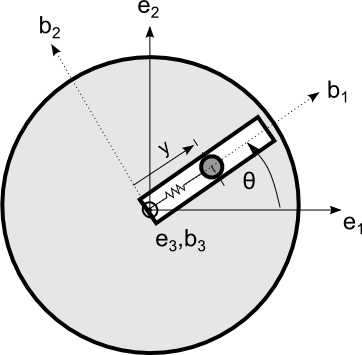

Consider the ball of mass $m$ constrained to move as shown in the figure above. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk and the orthonormal frame $\mathbf{b}$ is fixed to the disk with origin at the centre of the disk.  The disk is rotating about the $\mathbf{e}_3$ axis. Gravity acts in the negative $\mathbf{e}_3$ direction and the disk and the mass lies on a smooth horizontal surface. The un-stretched length of the spring is $y_0$. 

The position of the ball can be represented as $x$ in the $\mathbf{e}$ frame and as $X$ in the $\mathbf{b}$ frame. The forces acting on the ball can be represented as $f$ in the $\mathbf{e}$ frame and as $F$ in the $\mathbf{b}$ frame. Answer the following with detailed justification:

* Write down $x$ and $X$.

* Write down $f$ and $F$.

* Show that the two frames $\mathbf{b}$ and $\mathbf{e}$ are related by $\mathbf{b}=\mathbf{e}\,R$ where $R\in SO(3)$ and is explicitly given by

\begin{align}
R=\begin{bmatrix} \cos{\theta} & -\sin{\theta} & 0\\ \sin{\theta} & \cos{\theta} & 0\\ 0 & 0 & 1
\end{bmatrix}
\end{align}

* Show that
\begin{align}
\widehat{\Omega}=\begin{bmatrix} 0 & -\dot{\theta} & 0\\ \dot{\theta} & 0 & 0\\ 0 & 0 & 0
\end{bmatrix}
\end{align}

* Show that 
\begin{align}
\widehat{\Omega}^2=-\dot{\theta}^2\begin{bmatrix} 1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 0
\end{bmatrix}
\end{align}

* Show that

\begin{align}
\ddot{x}=R\left(\widehat{\Omega}^2X+2\widehat{\Omega}X+\dot{\widehat{\Omega}}X+\ddot{X}\right)
\end{align}

* Show that Newton's equations for the ball is given by
\begin{align}
m\left(\widehat{\Omega}^2X+2\widehat{\Omega}X+\dot{\widehat{\Omega}}X+\ddot{X}\right)=F.
\end{align}

* Thus show that
\begin{align}
\begin{bmatrix}
m(\ddot{y}-y\dot{\theta}^2) \\ m(2\dot{y}\dot{\theta}+y\ddot{\theta})\\ 0
\end{bmatrix}=
\begin{bmatrix}
-k(y-y_0) \\ N_2\\ N_3-mg
\end{bmatrix}.
\end{align}

* Simulate the motion for different initial conditions.


In [ ]:
# Defining X, F, R
theta, y = dynamicsymbols('theta y')
k, y0, N2, N3, m, g, t = symbols('k y_0 N_2 N_3 m g t', real=True)

X = Matrix([y, 0, 0])

F = Matrix([-k*(y-y0), N2, N3-m*g])

R = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])

Newton's equations in the moving frame $\mathbf{b}$ is
\begin{align}
m\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}\right)=F
\end{align}

Finding $\widehat{\Omega}$
\begin{align}
\widehat{\Omega}=R^T\dot{R}
\end{align}

In [ ]:
dR = Derivative(R)
dR = dR.doit()
OmegaHat = simplify(R.T @ dR)
OmegaHat

⎡0  -θ̇  0⎤
⎢        ⎥
⎢θ̇  0   0⎥
⎢        ⎥
⎣0  0   0⎦

In [ ]:
latex(OmegaHat)

'\\left[\\begin{matrix}0 & - \\frac{d}{d t} \\theta{\\left(t \\right)} & 0\\\\\\frac{d}{d t} \\theta{\\left(t \\right)} & 0 & 0\\\\0 & 0 & 0\\end{matrix}\\right]'

Finding $\widehat{\Omega}^2$

In [ ]:
OmegaHatSquare = simplify(OmegaHat ** 2)
OmegaHatSquare

⎡  2        ⎤
⎢-θ̇    0   0⎥
⎢           ⎥
⎢       2   ⎥
⎢ 0   -θ̇   0⎥
⎢           ⎥
⎣ 0    0   0⎦

Finding $\left(\widehat{\Omega}^2X+2\widehat{\Omega}\dot{X}+\dot{\widehat{\Omega}}X+\ddot{X}\right)$

In [ ]:
dOmegaHat = Derivative(OmegaHat)
dOmegaHat = simplify(dOmegaHat)

dX = Derivative(X)
dX = simplify(dX)
ddX = Derivative(dX)
ddX = simplify(ddX)
#Find 
RHS = OmegaHatSquare*X + 2*OmegaHat*dX + dOmegaHat*X + ddX

In [ ]:
RHS

⎡     2     ⎤
⎢- y⋅θ̇  + ÿ ⎥
⎢           ⎥
⎢y⋅θ̈ + 2⋅θ̇⋅ẏ⎥
⎢           ⎥
⎣     0     ⎦

In [ ]:
F

⎡-k⋅(-y₀ + y)⎤
⎢            ⎥
⎢     N₂     ⎥
⎢            ⎥
⎣  N₃ - g⋅m  ⎦

Hence equations of motion for the bead are
\begin{align}
\begin{bmatrix}
m(\ddot{y}-y\dot{\theta}^2) \\ m(2\dot{y}\dot{\theta}+y\ddot{\theta})\\ 0
\end{bmatrix}=
\begin{bmatrix}
-k(y-y_0) \\ N_2\\ N_3-mg
\end{bmatrix}.
\end{align}

Consider $\ddot{y}=-(k/m)(y-y_0)+y\dot{\theta}^2$

Let $X_1=y$ and $X_2=\dot{y}$

Then, $\dot{X_1}=X_2$

and $\dot{X_2}=-(k/m)(X_1-y_0)+X_1\dot{\theta}^2$

If $X=\begin{bmatrix}
X_1 \\ X_2
\end{bmatrix}$

Then
\begin{align}
\dot{X}=f(X)
\end{align}

Where
\begin{align}
f(X)=\begin{bmatrix}
X_2 \\ -(k/m)(X_1-y_0)+X_1\dot{\theta}^2
\end{bmatrix}
\end{align}

Augmenting the state with $\theta$ we have 
\begin{align}
X=\begin{bmatrix}
X_1 \\ X_2 \\ X_3
\end{bmatrix}
\end{align}

where $X_3=\theta$

Then 
\begin{align}
\dot{X}=f(X)
\end{align}

Where
\begin{align}
f(X)=\begin{bmatrix}
X_2 \\ -(k/m)(X_1-y_0)+X_1\dot{\theta}^2 \\ \dot{\theta}
\end{bmatrix}
\end{align}

In [ ]:
def bead_in_slotted_disk (X,t, parameters):
  g=9.806;
  m=1;
  k=5;
  y0 = parameters[1];
  dtheta=parameters[0];
  y=X[0];
  dy=X[1];
  ddy=y*dtheta**2-(k/m)*(y-y0);
  return [dy, ddy, dtheta]

In [ ]:
def simulateDySystem(dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    #self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig]

In [ ]:
Natural_Length=0.8;
omega=0.5;
y=1
dy=0
theta_init=0
[t,sol,fig]=simulateDySystem(bead_in_slotted_disk, 25,0.05, [1,0,theta_init], [omega, Natural_Length], 'Bead_in_slotted_disk', 'Time / t', '$y,\dot{y},\\theta$')

In [ ]:
md=mugas_dynamic_systems_simulation_functions()

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]
  theta = sol[i][2]
  # write as x=RX as well
  XX[i,:]=[y*np.cos(theta),y*np.sin(theta),0];

In [ ]:
fig=md.animate_particle_motion(XX,[[-2,2],[-2,2],[-2,2]],'Motion Observed in the e-frame')

# Q2 - Consider a ball of mass $m$ constrained to move as shown in the figure below. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk. The orthonormal frame $\mathbf{b}$ is fixed to the disk. The disk is rotating about a vertical axis (that is about the $\mathbf{e}_3$ axis). Write down the equations of motion of the mass and simulate the system for various different initial conditions.

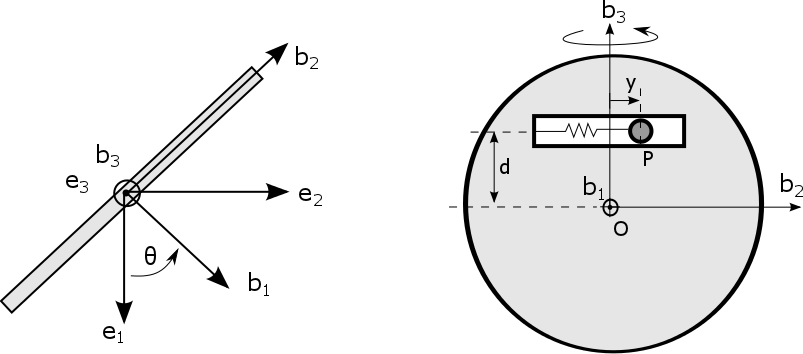

In [ ]:
# Defining X, F, R
theta, y = dynamicsymbols('theta y')
k, d, N1, N3, m, g, t = symbols('k d N_1 N_3 m g t', real=True)

X = Matrix([0, y, d])

F = Matrix([N1,-k*y, N3-m*g])

R = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
dR = Derivative(R)
dR = dR.doit()
OmegaHat = simplify(R.T @ dR)
OmegaHatSquare = simplify(OmegaHat ** 2)

dOmegaHat = Derivative(OmegaHat)
dOmegaHat = simplify(dOmegaHat)

dX = Matrix([0,Derivative(y),0])
dX = simplify(dX)
ddX = Derivative(dX)
ddX = simplify(ddX)
#Find 
RHS = OmegaHatSquare*X + 2*OmegaHat*dX + dOmegaHat*X + ddX


In [ ]:
RHS

⎡-y⋅θ̈ - 2⋅θ̇⋅ẏ⎤
⎢            ⎥
⎢      2     ⎥
⎢ - y⋅θ̇  + ÿ ⎥
⎢            ⎥
⎣     0      ⎦

In [ ]:
F

⎡   N₁   ⎤
⎢        ⎥
⎢  -k⋅y  ⎥
⎢        ⎥
⎣N₃ - g⋅m⎦

Equations of motion are
$m\ddot{y}=my\dot{\theta}^2-ky$

In [ ]:
def bead_in_slotted_disk_2(X, t, sysParameters):
  X1=X[0]; X2=X[1]; X3 = X[2];
  m=sysParameters[0]; k=sysParameters[1];
  thetaDot=sysParameters[2]; 
  dXdt=[X2, thetaDot**2*X1-k*X1/m, thetaDot];
  return dXdt

In [ ]:
m=1; k=4; y0=0.4; dtheta=0.2; thetai = 0;
[t,sol,fig]=md.simulateDySystem(bead_in_slotted_disk_2, 32,0.2, [1.5,0,thetai], [m,k,dtheta], '$y(t) \hspace{3mm}and\hspace{3mm} \dot{y}(t)\hspace{3mm} vs\hspace{3mm} t$', 'Time / t', '$y, \dot{y}, \\theta$')

In [ ]:
d = 2

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]
  theta = sol[i][2]
  XX[i,:]=[-y*np.sin(theta),y*np.cos(theta),d];

In [ ]:
fig=md.animate_particle_motion(XX,[[-3,3],[-3,3],[-3,3]],'Motion Observed in the e-frame')

# Q3 - Consider a ball of mass $m$ constrained to move as shown in figure. The orthonormal frame $\mathbf{e}$ is an earth fixed frame with origin at the centre of the disk. The orthonormal frame $\mathbf{c}$ is fixed to the disk. The disk is rotating about a vertical axis (that is about the $\mathbf{e}_3$ axis) and about an axis through its centre that is perpendicular to the disk (that is about the $\mathbf{c}_1$ axis). Write down the equations of motion of the mass and simulate its motion for various different initial conditions.

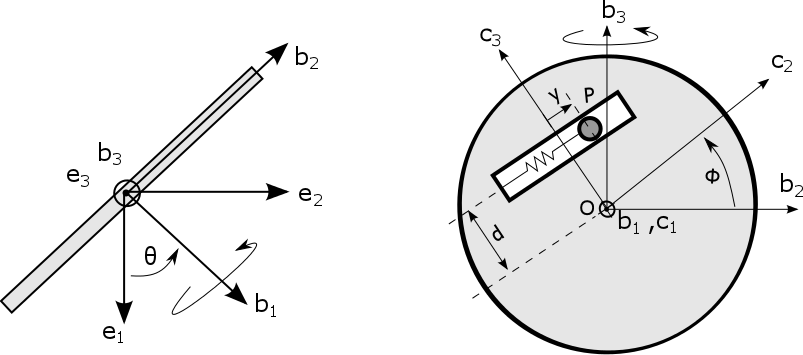

In [16]:
theta, phi, y = dynamicsymbols('theta phi y')
k, d, y0, N1, N3, m, g, t = symbols('k d y_0 N_2 N_3 m g t', real=True)

In [17]:
R3 = Matrix([[cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0], [0, 0, 1]])
R1 = Matrix([[1, 0, 0], [0, cos(phi), -sin(phi)], [0, sin(phi), cos(phi)]])

R = R3 @ R1

X = Matrix([0, y, d])

F = Matrix([N1, -k*(y-y0), N3])-m*g*R1 @ Matrix([0, 0, 1])
dR = Derivative(R)
dR = dR.doit()
OmegaHat = simplify(R.T @ dR)
OmegaHatSquare = simplify(OmegaHat ** 2)

In [18]:
dOmegaHat = Derivative(OmegaHat)
dOmegaHat = simplify(dOmegaHat)

dX = Matrix([0,Derivative(y),0])
dX = simplify(dX)
ddX = Derivative(dX)
ddX = simplify(ddX)

RHS = OmegaHatSquare*X + 2*OmegaHat*dX + dOmegaHat*X + ddX
RHS

⎡d⋅(sin(φ)⋅θ̈ + cos(φ)⋅φ̇⋅θ̇) + d⋅cos(φ)⋅φ̇⋅θ̇ + (sin(φ)⋅φ̇⋅θ̇ - cos(φ)⋅θ̈)⋅y 
⎢                                                                             
⎢                                     2                                       
⎢                         d⋅sin(2⋅φ)⋅θ̇          ⎛     2     2    2⎞          
⎢                         ───────────── - d⋅φ̈ + ⎝- cos (φ)⋅θ̇  - φ̇ ⎠⋅y + ÿ 
⎢                               2                                             
⎢                                                                             
⎢                                                           2                 
⎢                         ⎛     2     2    2⎞   y⋅sin(2⋅φ)⋅θ̇                 
⎢                       d⋅⎝- sin (φ)⋅θ̇  - φ̇ ⎠ + ───────────── + y⋅φ̈ + 2⋅φ̇⋅
⎣                                                     2                       

+ y⋅sin(φ)⋅φ̇⋅θ̇ - 2⋅cos(φ)⋅θ̇⋅ẏ⎤
                     ⎥
                     ⎥
                      ⎥
                         

In [19]:
F

⎡           N₂           ⎤
⎢                        ⎥
⎢g⋅m⋅sin(φ) - k⋅(-y₀ + y)⎥
⎢                        ⎥
⎣    N₃ - g⋅m⋅cos(φ)     ⎦

In [10]:
def bead_in_slotted_disk_3 (X,t, parameters):
  g=9.806;
  m=1;
  k=5;
  y0 = parameters[0];
  d = parameters[1]
  dtheta=parameters[2];
  dphi = parameters[3];
  
  y=X[0];
  dy=X[1];
  phi =X[3]
  ddy=y*dphi**2-(k/m)*(y-y0)+y*cos(phi)*cos(phi)*dtheta**2+(d/2)*sin(2*phi)*dtheta**2;
  return [dy, ddy, dtheta, dphi]

def simulateDySystem(dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    #self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig]

Rotating with the initial conditions of $\dot{\theta}=0.5$ and $\dot{\phi}=0.4$

In [11]:
Length=0.8;
dtheta=0.5;
dphi=0.4
theta = 0;
phi = 0
d = 1
[t,sol,fig]=simulateDySystem(bead_in_slotted_disk_3, 25,0.1, [1,0,theta, phi], [Length, d, dtheta, dphi], 'bead_in_slotted_disk_3', 'Time / t', '$y,\dot{y},\\theta,\\phi$')

In [13]:
md=mugas_dynamic_systems_simulation_functions()

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]
  phi = sol[i][3]
  theta = sol[i][2]
  XX[i,:]=[-y*np.sin(theta)*np.cos(phi),y*np.cos(phi)*np.cos(theta),y*np.sin(phi)];
  
fig=md.animate_particle_motion(XX,[[-2,2],[-2,2],[-2,2]],'Motion Observed in the e-frame')


# Q4 -  Consider the rotating spring pendulum shown in figure below (Figure copied from G. T. Greenwood).  The mass of the point $P$ is $m$. The un-stretched length of the spring is $L_0$. Neglecting friction and the moment of inertia of the spring derive the equations of motion of the system if the arm is rotating at a constant angular velocity of $\Omega$. Derive the equations of motion for the particle and simulate its motion for various different initial conditions.
 



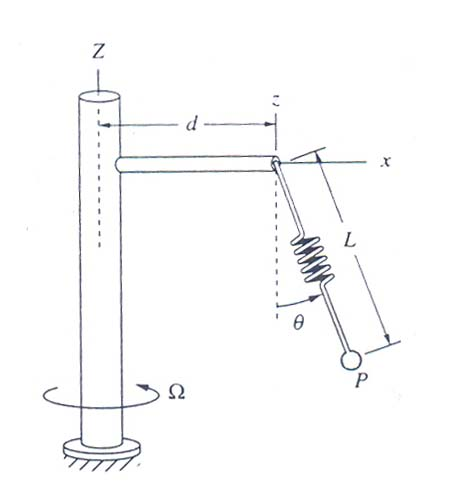

In [ ]:
theta, phi, y = dynamicsymbols('theta phi y')
k, d, y0, m, g, N1, N2, t = symbols('k d y_0 m g N_1 N_2 t')

In [ ]:
R3 = Matrix([[cos(phi), -sin(phi), 0], [sin(phi), cos(phi), 0], [0, 0, 1]])
# R1 = Matrix([[1, 0, 0], [0, cos(phi - (pi/2)), -sin(phi - (pi/2))], [0, sin(phi - (pi/2)), cos(phi - (pi/2))]])
R1 = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])


R = R3 @ R1
X = Matrix([d, 0, -y])

F = Matrix([N1, -m*g*sin(theta), k*(y-y0)-m*g*cos(theta)])

dR = Derivative(R)
dR = dR.doit()
OmegaHat = simplify(R.T @ dR)
OmegaHatSquare = simplify(OmegaHat ** 2)
dOmegaHat = Derivative(OmegaHat)
dOmegaHat = simplify(dOmegaHat)

dX = Matrix([0, 0, -Derivative(y)])
dX = simplify(dX)
ddX = Derivative(dX)
ddX = simplify(ddX)

RHS = OmegaHatSquare*X + 2*OmegaHat*dX + dOmegaHat*X + ddX
RHS

⎡        2                                                              ⎤
⎢   - d⋅φ̇  - (sin(θ)⋅φ̈ + cos(θ)⋅φ̇⋅θ̇)⋅y - y⋅cos(θ)⋅φ̇⋅θ̇ - 2⋅sin(θ)⋅φ̇⋅ẏ    ⎥
⎢                                                                       ⎥
⎢                                                        2              ⎥
⎢                                            y⋅sin(2⋅θ)⋅φ̇               ⎥
⎢d⋅(-sin(θ)⋅φ̇⋅θ̇ + cos(θ)⋅φ̈) + d⋅sin(θ)⋅φ̇⋅θ̇ - ───────────── + y⋅θ̈ + 2⋅θ̇⋅ẏ⎥
⎢                                                  2                    ⎥
⎢                                                                       ⎥
⎢                                             ⎛     2     2    2⎞       ⎥
⎣ d⋅(-sin(θ)⋅φ̈ - cos(θ)⋅φ̇⋅θ̇) + d⋅cos(θ)⋅φ̇⋅θ̇ - ⎝- sin (θ)⋅φ̇  - θ̇ ⎠⋅y - ÿ ⎦

In [ ]:
F

⎡           N₁            ⎤
⎢                         ⎥
⎢       -g⋅m⋅sin(θ)       ⎥
⎢                         ⎥
⎣-g⋅m⋅cos(θ) + k⋅(-y₀ + y)⎦

In [ ]:
def bead_in_spring (X,t, parameters):
  g=9.806;
  m=1;
  k=8;
  y0 = parameters[0];
  d = parameters[1]
  dphi=parameters[2];
  
  y=X[0];
  theta=X[1]
  phi = X[2]
  dy=X[3];
  dtheta =X[4]
  ddy=y*dtheta**2-(k/m)*(y-y0)+y*sin(theta)*sin(theta)*dphi**2+g*cos(theta)+d*sin(theta)*dphi**2;
  ddtheta = -2*dtheta*(dy/y)+d*cos(theta)*(dphi**2)/y-g*sin(theta)/y+(sin(2*theta)/2)*dphi**2
  # ddphi = (sin(2*phi)*dtheta**2)/2-2*dphi*(dy/y)+g*sin(theta)/y
  return [dy, dtheta, dphi, ddy, ddtheta]

def simulateDySystem(dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    #self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig]

In [ ]:
Length=0.6;
dtheta=0;
dphi = 0.5
theta = np.pi/3;
phi = 0
d = 10
y = 1
dy= 0
[t,sol,fig]=simulateDySystem(bead_in_spring, 15,0.01, [y, theta, phi, dy, dtheta], [Length, d, dphi], 'bead_in_spring', 'Time / t', '$y,\\theta,\\phi,\dot{y},\dot{\\theta}$')

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  y=sol[i][0]
  phi = sol[i][2]
  theta = sol[i][1]
  XX[i,:]=[-d*np.sin(phi)-y*np.sin(theta)*np.sin(phi),d*np.cos(phi)+y*np.sin(theta)*np.cos(phi),-y*np.cos(theta)];
  
fig=md.animate_particle_motion(XX,[[-15,15],[-15,15],[-15,15]],'Motion Observed in the e-frame')

# Q5 -  Consider the particle that is constrained to move in a rotating hoop as shown in the figure below.  The mass of the bead is $m$ and the radius of the hoop is $r$. Neglecting friction derive the equations of motion of the bead if the bead is rotating at a constant angular velocity of $\omega$. Simulate its motion for various different initial conditions.
 



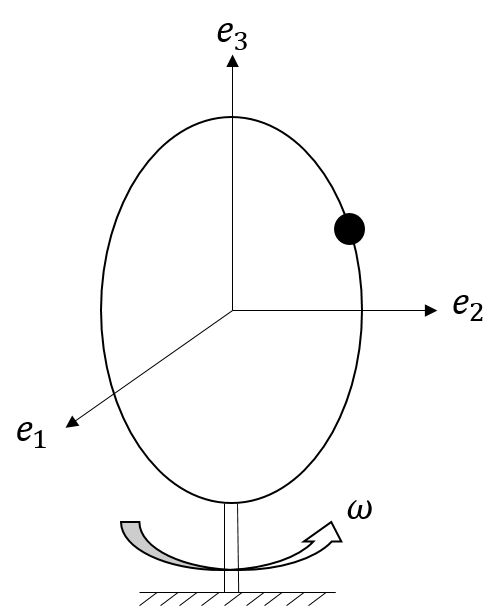

In [ ]:
theta, phi= dynamicsymbols('theta phi')
r, m, g, N1, N2, t = symbols('r m g N_1 N_2 t', real=True)

In [ ]:
R3 = Matrix([[cos(phi), -sin(phi), 0], [sin(phi), cos(phi), 0], [0, 0, 1]])
# R1 = Matrix([[1, 0, 0], [0, cos(phi - (pi/2)), -sin(phi - (pi/2))], [0, sin(phi - (pi/2)), cos(phi - (pi/2))]])
R1 = Matrix([[1, 0, 0], [0, cos(theta), -sin(theta)], [0, sin(theta), cos(theta)]])


R = R3 @ R1
X = Matrix([0, r, 0])


F = Matrix([N1, -m*g*sin(theta), k*(y-y0)-m*g*cos(theta)])

dR = Derivative(R)
dR = dR.doit()
OmegaHat = simplify(R.T @ dR)
OmegaHatSquare = simplify(OmegaHat ** 2)
dOmegaHat = Derivative(OmegaHat)
dOmegaHat = simplify(dOmegaHat)

dX = Matrix([0, 0, 0])
ddX = Matrix([0, 0, 0])

RHS = OmegaHatSquare*X + 2*OmegaHat*dX + dOmegaHat*X + ddX
RHS

⎡r⋅(sin(θ)⋅φ̇⋅θ̇ - cos(θ)⋅φ̈) + r⋅sin(θ)⋅φ̇⋅θ̇⎤
⎢                                        ⎥
⎢           ⎛     2     2    2⎞          ⎥
⎢         r⋅⎝- cos (θ)⋅φ̇  - θ̇ ⎠          ⎥
⎢                                        ⎥
⎢                      2                 ⎥
⎢          r⋅sin(2⋅θ)⋅φ̇                  ⎥
⎢          ───────────── + r⋅θ̈           ⎥
⎣                2                       ⎦

In [ ]:
F

⎡      N₁       ⎤
⎢               ⎥
⎢N₂ - g⋅m⋅sin(θ)⎥
⎢               ⎥
⎣  -g⋅m⋅cos(θ)  ⎦

In [ ]:
def bead_in_ring (X,t, parameters):
  g=9.806;
  m=1;
  r = parameters[0]
  dphi=parameters[1];
  
  theta=X[0];
  dtheta=X[1]
  ddtheta = -g*cos(theta)/r - (sin(2*theta)*dphi**2)/2
  return [dtheta, ddtheta, dphi]

def simulateDySystem(dynamicSystemModel, Tmax, dT, X0, sysPara, figTitle, xLabel, yLabel):
    t = np.linspace(0, Tmax, int(Tmax/dT+1))
    sol = odeint(dynamicSystemModel, X0, t, args=(sysPara,));
    #self.soln=sol;
    fig = go.Figure()
    [nt,nS]=sol.shape;

    # Add traces
    for nn in range(nS):
      fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
      fig.update_layout(title=figTitle, xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
    
    fig.show()
    return [t,sol,fig]

In [ ]:
dtheta=0;
theta = np.pi/3
phi=0
dphi = 0.6
r = 1

[t,sol,fig]=simulateDySystem(bead_in_ring, 5,0.01, [theta, dtheta, phi], [r, dphi], 'bead_in_ring', 'Time / t', '$\\theta,\dot{\\theta},\\phi$')

In [ ]:
XX=np.zeros((len(t),3));
for i,tt in enumerate(t):
  phi = sol[i][2]
  theta=sol[i][0]
  XX[i,:]=[-r*np.sin(phi)*np.cos(theta),r*np.cos(phi)*np.cos(theta),r*np.sin(theta)];
  
fig=md.animate_particle_motion(XX,[[-1.2,1.2],[-1.2,1.2],[-1.2,1.2]],'Motion Observed in the e-frame')